In [1]:
from sklearn import datasets
digits = datasets.load_digits()
digits.keys()

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [2]:
digits.target[:40]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9])

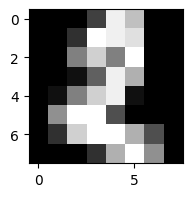

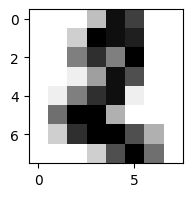

In [ ]:
import matplotlib.pyplot as plt
img = digits.images[2]

plt.figure(figsize=(2,2))
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

plt.figure(figsize=(2,2))
plt.imshow(img, cmap=plt.cm.gray_r)
plt.show()

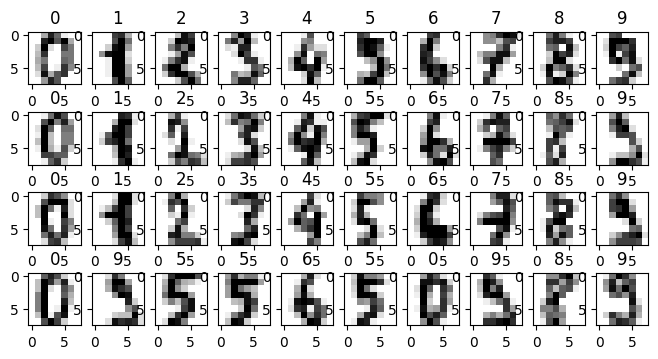

In [ ]:
def visual_multi(i):
  nplots = 40
  fig = plt.figure(figsize=(8,4))
  for j in range(nplots):
    plt.subplot(4, 10, j+1)
    plt.imshow(digits.images[i+j], cmap='binary')
    plt.title(digits.target[i+j])
  plt.show()
visual_multi(0)

In [ ]:
n_sample = len(digits.images)
n_sample

1797

In [ ]:
X = digits.images.reshape((n_sample, -1))
X[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
X2 = digits.data[:1]
X2[:1]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
y = digits.target
y[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)
X_train.shape, X_test.shape


((1078, 64), (719, 64))

In [ ]:
from sklearn import svm
model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict[:20]

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 1, 3])

In [ ]:
y_test[:20]

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0, 9, 4, 7, 4, 0, 1, 1, 8, 1, 3])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("accuracy score : {:.4f}".format(accuracy_score(y_test, y_predict)))
print(classification_report(y_test, y_predict))


accuracy score : 0.9819
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        63
           3       1.00      0.95      0.97        80
           4       1.00      0.99      0.99        75
           5       0.96      0.99      0.97        71
           6       1.00      0.99      0.99        71
           7       0.95      0.99      0.97        80
           8       0.94      1.00      0.97        64
           9       0.97      0.94      0.95        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719



In [ ]:
!pip install scikit-plot

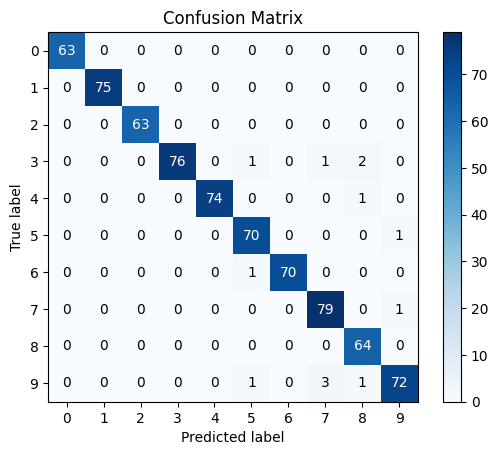

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplot
skplot.metrics.plot_confusion_matrix(y_test, y_predict)
plt.show()

<ipython-input-56-ac69bbdd4995>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8,8),Image.ANTIALIAS) # ปรับขนาดเป็น 8x8


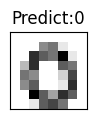

<ipython-input-56-ac69bbdd4995>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8,8),Image.ANTIALIAS) # ปรับขนาดเป็น 8x8


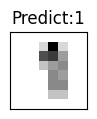

<ipython-input-56-ac69bbdd4995>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8,8),Image.ANTIALIAS) # ปรับขนาดเป็น 8x8


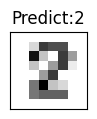

<ipython-input-56-ac69bbdd4995>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8,8),Image.ANTIALIAS) # ปรับขนาดเป็น 8x8


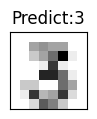

<ipython-input-56-ac69bbdd4995>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8,8),Image.ANTIALIAS) # ปรับขนาดเป็น 8x8


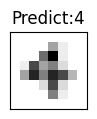

<ipython-input-56-ac69bbdd4995>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8,8),Image.ANTIALIAS) # ปรับขนาดเป็น 8x8


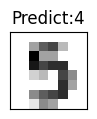

<ipython-input-56-ac69bbdd4995>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8,8),Image.ANTIALIAS) # ปรับขนาดเป็น 8x8


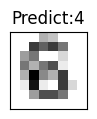

<ipython-input-56-ac69bbdd4995>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8,8),Image.ANTIALIAS) # ปรับขนาดเป็น 8x8


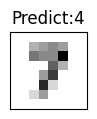

<ipython-input-56-ac69bbdd4995>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8,8),Image.ANTIALIAS) # ปรับขนาดเป็น 8x8


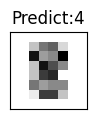

<ipython-input-56-ac69bbdd4995>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((8,8),Image.ANTIALIAS) # ปรับขนาดเป็น 8x8


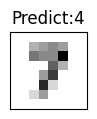

In [ ]:
import numpy as np
from PIL import Image, ImageOps
model = svm.SVC(gamma='scale')
model.fit(X,y)
#import cv2
pics = [0,1,2,3,4,5,6,7,8,9]
for i in pics:
  image = Image.open('/content/drive/MyDrive/CPE270/'+str(i)+'.png')
  #plt.imshow(image)
  img = image.convert('L') # แปลงเป็นภาพเทา
  img = ImageOps.invert(img) # แปลงเป็นตัวเลขสีดำบนพื้นขาว
  img = img.resize((8,8),Image.ANTIALIAS) # ปรับขนาดเป็น 8x8
  pixel = np.array(img)
  pixel = pixel/255.0 * 16
  pixel = pixel.astype('int')
  my_digit = pixel.reshape(1,-1) # 1 x 64
  y_predict = model.predict(my_digit)
  # แสดงภาพตัวเลขและค่าผลลัพธ์
  plt.figure(figsize=(1,1))
  plt.imshow(pixel,cmap=plt.cm.gray_r)
  plt.title('Predict:{}'.format(y_predict[0]))
  plt.xticks([])
  plt.yticks([])
  plt.show()